In [48]:
import pandas as pd
import numpy as np
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline

import pydotplus
import io
from scipy import misc
import pickle 

df = pd.read_csv("/Users/felipehenao/hackaton.csv")

df.head()

,id,cedula,dia_morosidad,e_laborarl,trabajo,edad,sexo,salario,ing_extra,apc,score,corregimiento,provincia,ciudad,missing_score,missing_salario,missing_apc,missing_corregimiento,rare_province,default_90d,prepaid_suscription,plan_voz,line_number,weekly_minutes_calls,arpu
0,1946,14701d75cf81fa11eee5115ea7ebb5ebeb2114c8b8edc0...,0,1815,73,60,1,3631.25,0.0,975,-999,150,39,17,1,0,0,0,0,0,1,0,1,59.1,13.9
1,1934,add27b6649b06dead2f28aed4845e1f1729f1b83f33a2e...,0,89,201,63,1,0.00,0.0,975,-999,805,39,17,1,1,0,0,0,0,1,0,1,88.0,30.2
2,3702,17ea748fc013a731e0c43b536d412f69ec40887d07c2ed...,0,502,242,34,1,2825.93,0.0,975,102,683,56,26,0,0,0,0,1,0,1,0,0,85.6,18.5
3,5858,260c9dbce1e21942683cc8ca51d5308867eb8068547d10...,0,256,239,54,0,1000.00,1000.0,975,94,602,56,38,0,0,0,0,1,0,1,1,0,69.6,25.7
4,4822,0400d62a767f7fa14a8a052e6ff7dbfcc1b7b58bad2158...,0,540,263,54,0,870.88,0.0,975,349,310,56,49,0,0,0,0,1,0,1,0,0,39.3,20.5


In [49]:
#drop column's id and cedula
df = df.drop(columns=['id','cedula'])

In [50]:
df.head()

,dia_morosidad,e_laborarl,trabajo,edad,sexo,salario,ing_extra,apc,score,corregimiento,provincia,ciudad,missing_score,missing_salario,missing_apc,missing_corregimiento,rare_province,default_90d,prepaid_suscription,plan_voz,line_number,weekly_minutes_calls,arpu
0,0,1815,73,60,1,3631.25,0.0,975,-999,150,39,17,1,0,0,0,0,0,1,0,1,59.1,13.9
1,0,89,201,63,1,0.00,0.0,975,-999,805,39,17,1,1,0,0,0,0,1,0,1,88.0,30.2
2,0,502,242,34,1,2825.93,0.0,975,102,683,56,26,0,0,0,0,1,0,1,0,0,85.6,18.5
3,0,256,239,54,0,1000.00,1000.0,975,94,602,56,38,0,0,0,0,1,0,1,1,0,69.6,25.7
4,0,540,263,54,0,870.88,0.0,975,349,310,56,49,0,0,0,0,1,0,1,0,0,39.3,20.5


In [51]:
#Full dataset picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
dia_morosidad            5000 non-null int64
e_laborarl               5000 non-null int64
trabajo                  5000 non-null int64
edad                     5000 non-null int64
sexo                     5000 non-null int64
salario                  5000 non-null float64
ing_extra                5000 non-null float64
apc                      5000 non-null int64
score                    5000 non-null int64
corregimiento            5000 non-null int64
provincia                5000 non-null int64
ciudad                   5000 non-null int64
missing_score            5000 non-null int64
missing_salario          5000 non-null int64
missing_apc              5000 non-null int64
missing_corregimiento    5000 non-null int64
rare_province            5000 non-null int64
default_90d              5000 non-null int64
prepaid_suscription      5000 non-null int64
plan_voz                 5000 non-

In [52]:
#Resumen descriptivo de cada columna del dataset
pd.set_option('display.max_columns',50)
df.describe()

,dia_morosidad,e_laborarl,trabajo,edad,sexo,salario,ing_extra,apc,score,corregimiento,provincia,ciudad,missing_score,missing_salario,missing_apc,missing_corregimiento,rare_province,default_90d,prepaid_suscription,plan_voz,line_number,weekly_minutes_calls,arpu
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,42.752000,1868.764600,150.940200,41.930200,0.57580,1011.409694,16.509230,410.029800,-393.506000,218.303200,48.422400,35.279400,0.441600,0.425600,0.398400,0.299600,0.831600,0.150000,0.891600,0.560400,0.31860,57.428640,26.97394
std,84.012895,1063.249764,102.358162,13.223385,0.49427,2842.615676,265.345387,351.443846,543.874663,245.640885,16.486502,16.423973,0.496627,0.494483,0.489618,0.458129,0.374259,0.357107,0.310916,0.496388,0.46598,15.684148,7.24967
min,0.000000,0.000000,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,947.750000,37.000000,31.000000,0.00000,0.000000,0.000000,0.000000,-999.000000,0.000000,44.000000,22.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,46.875000,22.10000
50%,19.500000,1815.000000,146.000000,40.000000,1.00000,520.000000,0.000000,537.000000,19.000000,133.000000,56.000000,38.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,57.400000,26.90000
75%,60.000000,2733.750000,249.000000,50.000000,1.00000,1000.000000,0.000000,718.000000,72.000000,402.000000,56.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,68.200000,31.80000
max,2868.000000,3564.000000,321.000000,106.000000,1.00000,122021.690000,12000.000000,975.000000,1423.000000,983.000000,81.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,111.900000,51.60000


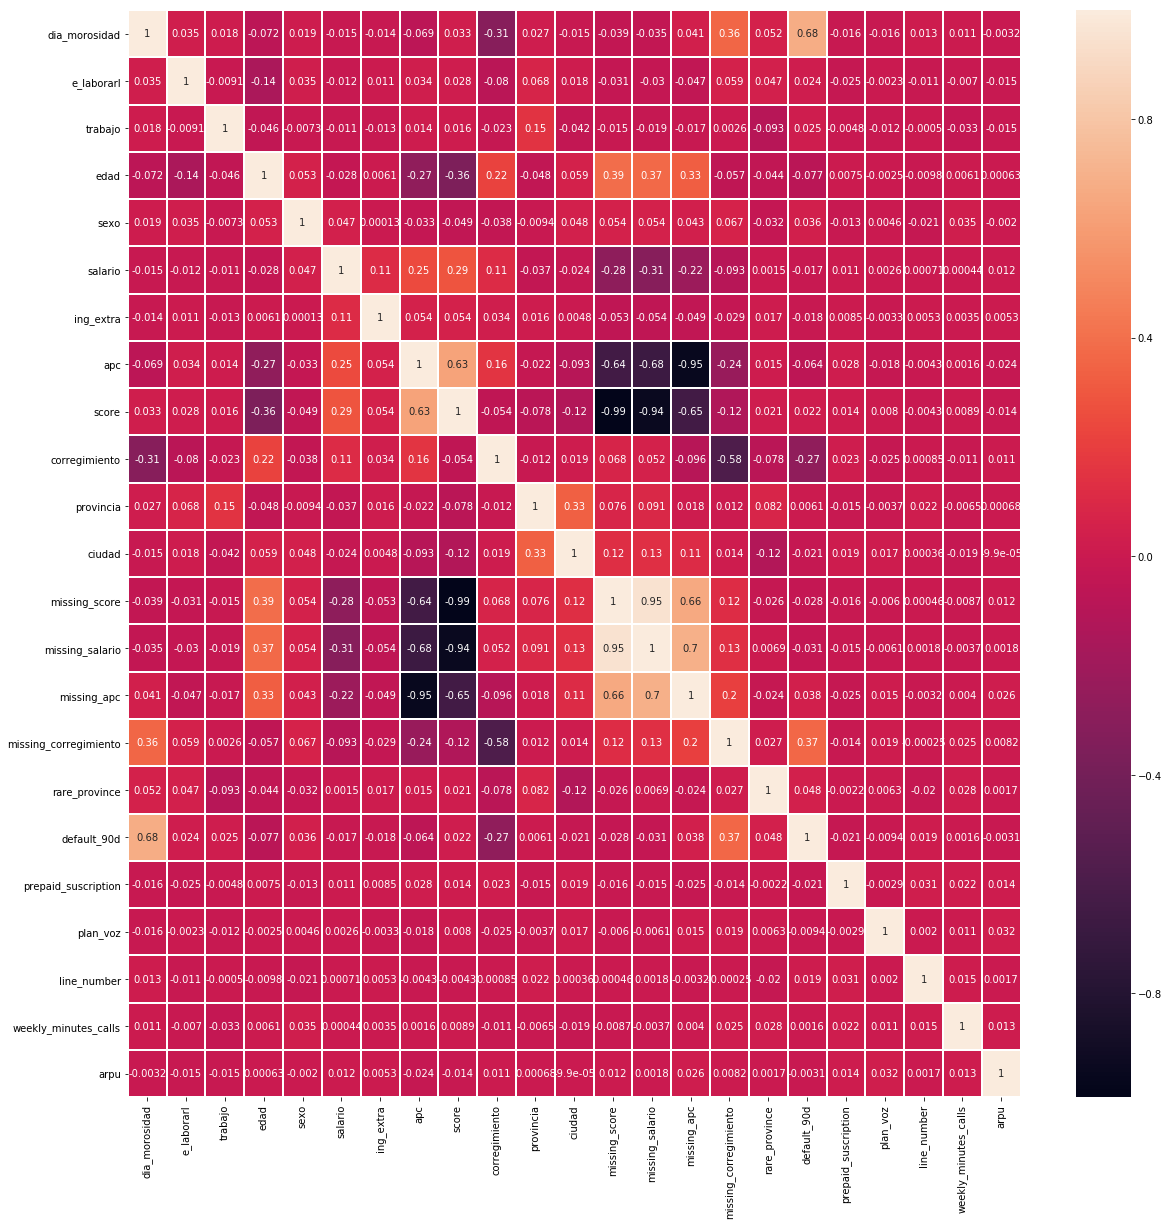

In [53]:
#Correlation Matrix

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(df.corr(),linewidths=1, annot=True)
plt.show()

In [54]:
#resumen de estadistica descriptiva de nuestra target variable
df['dia_morosidad'].describe()

count    5000.000000
mean       42.752000
std        84.012895
min         0.000000
25%         0.000000
50%        19.500000
75%        60.000000
max      2868.000000
Name: dia_morosidad, dtype: float64

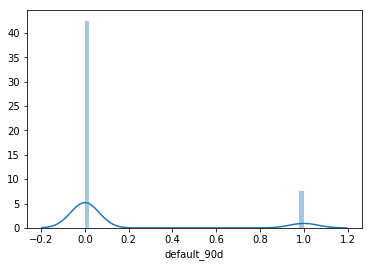

In [55]:
#histogram
sns.distplot(df['default_90d']);

In [56]:
#skewness and kurtosis
print("Skewness: %f" % df['default_90d'].skew())
print("Kurtosis: %f" % df['default_90d'].kurt())

Skewness: 1.960980
Kurtosis: 1.846183


In [57]:
#Recursive feature elimination.

In [58]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics  


In [59]:
# First extract the target variable which is our House prices
Y = df["default_90d"]
# Drop price from the house dataframe and create a matrix out of the house data
df = df.drop(['default_90d'], axis=1)
X = df.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = df.columns

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [60]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [61]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [62]:
lr = LinearRegression(normalize=True)
lr.fit(X, Y)

#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["LR"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [63]:
# RFE Logistic Reg validation

logit = LogisticRegression()


lg = RFE(logit, 18)
lg = lg.fit(X, Y)
print(lg.support_)
print(lg.ranking_)

ranks["Logit"] = ranking(list(map(float, lg.ranking_)), colnames, order=-1)

[ True False False  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 4 3 1 1 5 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [64]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [67]:
# RFE Random Forest validation

#rf = RandomForestRegressor(n_jobs=-1, n_estimators=500, verbose=3)

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

scores = cross_val_score(rf, X, Y, cv=100, scoring = "accuracy")


In [68]:
# RFE XGB Validation

XGB = XGBClassifier()
XGB.fit(X, Y)

ranks["XGB"] = ranking(rf.feature_importances_, colnames)

In [69]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	LR	Lasso	LinReg	Logit	RF	Ridge	XGB	rlasso/Stability	Mean
dia_morosidad	0.62	1.0	0.02	1.0	1.0	0.02	1.0	0.0	0.58
e_laborarl	0.05	0.0	0.0	0.25	0.0	0.0	0.0	0.0	0.04
trabajo	0.29	0.01	0.0	0.5	0.0	0.0	0.0	0.0	0.1
edad	0.52	0.09	0.0	1.0	0.0	0.0	0.0	0.0	0.2
sexo	0.67	0.0	0.11	1.0	0.0	0.11	0.0	0.0	0.24
salario	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
ing_extra	0.1	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.14
apc	0.19	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.15
score	0.14	0.0	0.0	0.75	0.0	0.0	0.0	0.0	0.11
corregimiento	0.24	0.03	0.0	1.0	0.0	0.0	0.0	0.0	0.16
provincia	0.48	0.05	0.0	1.0	0.0	0.0	0.0	0.0	0.19
ciudad	0.33	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.17
missing_score	0.86	0.0	0.12	1.0	0.0	0.06	0.0	0.0	0.26
missing_salario	0.95	0.0	0.52	1.0	0.0	0.49	0.0	0.0	0.37
missing_apc	0.81	0.0	0.14	1.0	0.0	0.14	0.0	0.0	0.26
missing_corregimiento	1.0	0.0	1.0	1.0	0.0	1.0	0.0	0.0	0.5
rare_province	0.9	0.0	0.14	1.0	0.0	0.14	0.0	0.0	0.27
prepaid_suscription	0.76	0.0	0.09	1.0	0.0	0.09	0.0	0.0	0.24
plan_voz	0.57	0.0	0.01	1.0	0.0	0.01	0.0	0.0	0.

In [70]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


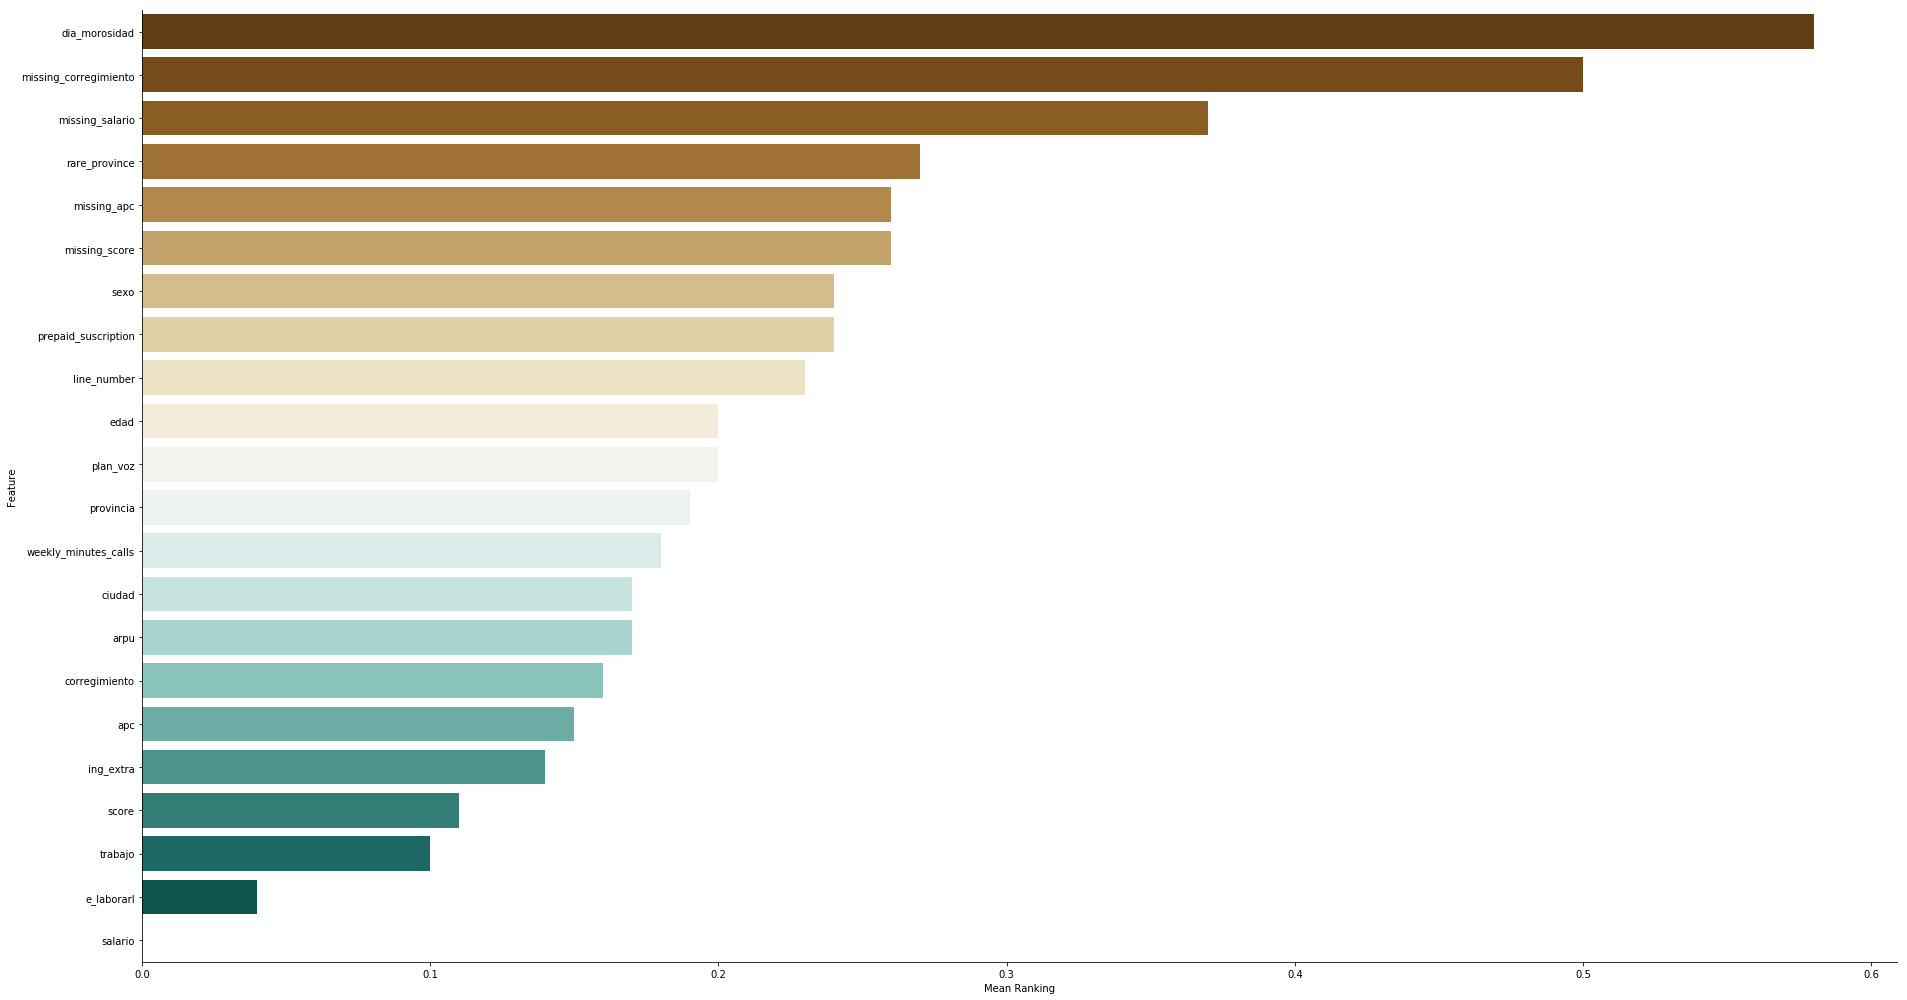

In [71]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='BrBG')

In [72]:
df = pd.DataFrame(df)

In [73]:
df.head()

,dia_morosidad,e_laborarl,trabajo,edad,sexo,salario,ing_extra,apc,score,corregimiento,provincia,ciudad,missing_score,missing_salario,missing_apc,missing_corregimiento,rare_province,prepaid_suscription,plan_voz,line_number,weekly_minutes_calls,arpu
0,0,1815,73,60,1,3631.25,0.0,975,-999,150,39,17,1,0,0,0,0,1,0,1,59.1,13.9
1,0,89,201,63,1,0.00,0.0,975,-999,805,39,17,1,1,0,0,0,1,0,1,88.0,30.2
2,0,502,242,34,1,2825.93,0.0,975,102,683,56,26,0,0,0,0,1,1,0,0,85.6,18.5
3,0,256,239,54,0,1000.00,1000.0,975,94,602,56,38,0,0,0,0,1,1,1,0,69.6,25.7
4,0,540,263,54,0,870.88,0.0,975,349,310,56,49,0,0,0,0,1,1,0,0,39.3,20.5


In [74]:
df = df.drop(["salario", "e_laborarl", "trabajo", "score", "ing_extra", "apc", "corregimiento", "ciudad", "provincia"], axis = 1)

In [75]:
df.head()

,dia_morosidad,edad,sexo,missing_score,missing_salario,missing_apc,missing_corregimiento,rare_province,prepaid_suscription,plan_voz,line_number,weekly_minutes_calls,arpu
0,0,60,1,1,0,0,0,0,1,0,1,59.1,13.9
1,0,63,1,1,1,0,0,0,1,0,1,88.0,30.2
2,0,34,1,0,0,0,0,1,1,0,0,85.6,18.5
3,0,54,0,0,0,0,0,1,1,1,0,69.6,25.7
4,0,54,0,0,0,0,0,1,1,0,0,39.3,20.5


In [76]:
#Split of training & test data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)


In [77]:
print (len(y_train), len(y_test))
#Training & Test size:

3500 1500


In [78]:
# 1er. Modelo = Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier()

In [79]:
dt.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
y_pred = dt.predict(X_test)  

In [81]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1261    0]
 [   0  239]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1261
          1       1.00      1.00      1.00       239

avg / total       1.00      1.00      1.00      1500



In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

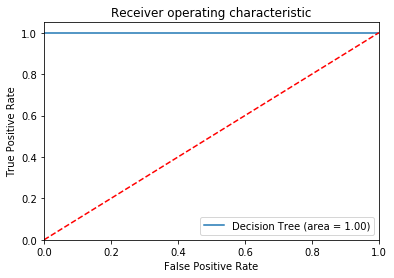

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_ROC= roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_ROC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dt_ROC')
plt.show()

In [84]:
# 2do Modelo: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [85]:
rfc.fit(X_train, y_train)
y2_pred = rfc.predict(X_test)


In [86]:
print(confusion_matrix(y_test, y2_pred))  
print(classification_report(y_test, y2_pred))

[[1261    0]
 [   1  238]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1261
          1       1.00      1.00      1.00       239

avg / total       1.00      1.00      1.00      1500



In [87]:
print("Accuracy of Random Forest:",metrics.accuracy_score(y_test, y2_pred))

Accuracy of Random Forest: 0.9993333333333333


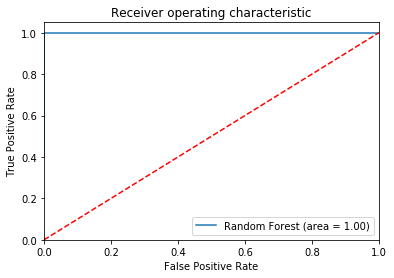

In [88]:
rfc_ROC= roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_ROC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

In [89]:
# 3er Modelo: Logistic Regression

In [90]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
y3_pred = logr.predict(X_test)
print('Accuracy of logistic regression: {:.2f}'.format(logr.score(X_test, y_test)))

Accuracy of logistic regression: 0.98


In [92]:
confusion_matrix = confusion_matrix(y_test, y3_pred)
print(confusion_matrix)
print(classification_report(y_test, y3_pred))

[[1239   22]
 [  11  228]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1261
          1       0.91      0.95      0.93       239

avg / total       0.98      0.98      0.98      1500



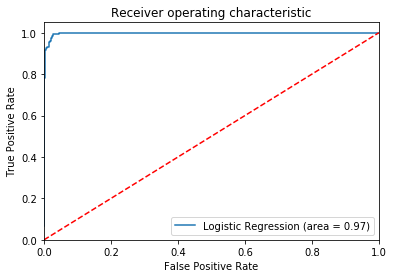

In [93]:
logr_ROC= roc_auc_score(y_test, logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logr_ROC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('logr_ROC')
plt.show()

In [94]:
# 4to Modelo: Naives Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)


GaussianNB(priors=None)

In [95]:
y4_pred = nb.predict(X_test)
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y4_pred))

Accuracy of Naive Bayes: 0.8326666666666667


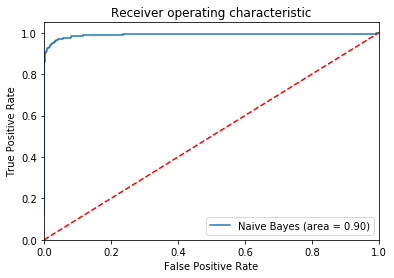

In [96]:
nb_ROC= roc_auc_score(y_test, nb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_ROC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [97]:
#5to Modelo: Linear Regression

In [98]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
y5_pred = lr.predict(X_test)

In [100]:
# regression coefficients
print('Coefficients: \n', lr.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lr.score(X_test, y_test)))

Coefficients: 
 [ 2.36176133e-03 -6.29081361e-06  1.06757633e-04 -5.67182071e-04
  1.01755649e-02  3.21758502e-07 -4.55097772e-06 -7.12138065e-05
  3.78279150e-06  3.43746781e-05 -1.35083003e-04 -1.73262474e-04
  4.23364726e-02 -5.04148579e-02 -4.69643413e-02  1.33380563e-01
  1.75768736e-02 -9.31625564e-03 -1.47978461e-03 -1.80254539e-03
  9.97744030e-05  1.14396320e-04]
Variance score: 0.5389850876918867


In [101]:
from sklearn.metrics import r2_score
print ("R2 Score: \n", r2_score(y_test, y5_pred))                                              

R2 Score: 
 0.5389850876918867


In [102]:
from sklearn.metrics import mean_squared_log_error
print ("RMSLE Score: \n", np.sqrt(mean_squared_log_error(y_test, y5_pred)))

RMSLE Score: 
 0.16566507746281867


In [103]:
#Comparasión de Modelos
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

logr: 0.981400 (0.006873)
rfc: 0.999800 (0.000600)
dt: 1.000000 (0.000000)
nb: 0.829400 (0.069553)
lda: 0.944200 (0.010638)


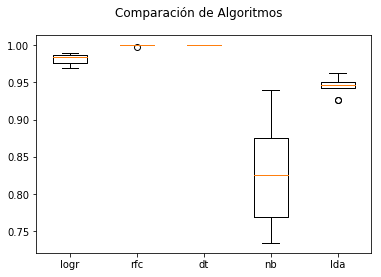

In [104]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('logr', LogisticRegression()))
models.append(('rfc', RandomForestClassifier()))
models.append(('dt', DecisionTreeClassifier()))
models.append(('nb', GaussianNB()))
models.append(('lda', LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
#Tomaremos el modelo Naive Bayes Gaussian!!!

In [108]:
pickle.dump(nb, open("Hackathon_NB_model.pkl", "wb"))
nb_pkl = pickle.load(open("Hackathon_NB_model.pkl", "rb"))

In [109]:
nb_pkl

GaussianNB(priors=None)

In [ ]:
url = "http://localhost:9000/api"
data = json.dumps({'dia_morosidad':0,'edad':30,'sexo':1,'missing_score':0,'missing_salario':1,'missing_apc':1,'missing_corregimiento':0,'rare_province','prepaid_suscription','plan_voz','line_number','weekly_minutes_call','arpu'
    
})